# Import Module

In [1]:
!pip install nltk
!pip install textblob 
!pip install tweepy
!pip install re

  ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [3]:
import re

In [2]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\billy.sagala01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**SOURCE** :  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python)

# SECTION A : Data Preparation

## Step A.1. Getting the authentication credentials

In [60]:
# initialize api instance
consumer_key = 'MLsdNl7mr9BOsXcjDkxJ3CWQo'
consumer_secret = 'ZONPHiccLDntsF3JAgApgjY7aPtCAYRMogp6V2T7JjlECyscyx'
access_token = '191425511-xwE7qOTDrdwUBsh5KhSFC9oO0t2LEB1kU4L4T405'
access_token_secret = 'X9yQ5FbTVwrhawnCym5AwhNss02lwlGdqQxVYQVHJpl66'

#Authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

## Step A.2. Getting a Dataset from twitter

In [107]:
#get tweet 
tweets = tp.Cursor(api.search,q="#tofu",lang="en").items(500)
result = []
for tweet in  tweets :
    result.append(tweet)

## Step A.3 Extract Tweet to pandas dataframe

In [108]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [109]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189464267793358848,"RT @agargmd: @DrASingh Dear Amar, it's not har...",2019-10-30 08:49:15,1,vegan_raven,2604,,[]
1,1189459483715612673,HEALTHY HUMP DAY | A grilled tofu and dragon f...,2019-10-30 08:30:14,0,CashmereSystems,56,"Santa Barbara, CA","[{'text': 'vegan', 'indices': [90, 96]}, {'tex..."
2,1189405611093446657,RT @planthealthman: The Vegan Special Burger f...,2019-10-30 04:56:10,1,DarrenCutrupi,784,"Near Canberra, Australia",[]
3,1189405492046528512,The Vegan Special Burger from As Nature Intend...,2019-10-30 04:55:42,1,planthealthman,100,Australia,[]
4,1189403362564833280,New day new stunt. #tofu #sandwich https://t.c...,2019-10-30 04:47:14,0,kreitcher,452,"Hyderabad, India","[{'text': 'tofu', 'indices': [19, 24]}, {'text..."


In [110]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [111]:
len(dataframe)

258

# Section B : Data Preprocessing

## Step B.1. Basic Text Pre-processing 

### 1. Lower casing

In [112]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    @drmarthagulati @heartotxheartmd @purviparwani...
1    #tokyo #itadakimasu!! this is #udon with deep ...
2    thanksgiving illo for seattle met sept 20, 201...
3    for the record i want everyone to know that: ♥...
4    features of the day for tue, oct 22nd: tomatil...
Name: text, dtype: object

### 2. Punctuation removal

In [113]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,drmarthagulati heartotxheartmd purviparwani vi...
1,tokyo itadakimasu this is udon with deep fried...
2,thanksgiving illo for seattle met sept 20 2019...
3,for the record i want everyone to know that t...
4,features of the day for tue oct 22nd tomatillo...


### 3. Stopwords removal

In [114]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    drmarthagulati heartotxheartmd purviparwani vi...
1    tokyo itadakimasu udon deep fried tofu kitsune...
2    thanksgiving illo seattle met sept 20 2019 art...
3    record want everyone know posted someone ate t...
4    features day tue oct 22nd tomatillo chicken bl...
5    indonesian tempe tofu buyers prefer ussoy find...
6    asked delivered tofu new dishes coming soon se...
7              wake smell chai tofu httpstco9uhjiencjc
8    picture within picture new addition tofu thai ...
9    pressing whey put curds tofu curdsandwhey home...
Name: text, dtype: object

### 4. Frequent words removal

In [115]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

tofu       212
rt          49
vegan       38
amp         34
dinner      31
veggies     23
day         21
hot         19
pot         18
chicken     16
dtype: int64

In [116]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    drmarthagulati heartotxheartmd purviparwani vi...
1    tokyo itadakimasu udon deep fried kitsuneudon ...
2    thanksgiving illo seattle met sept 20 2019 art...
3    record want everyone know posted someone ate t...
4    features tue oct 22nd tomatillo blackened salm...
Name: text, dtype: object

### 5. Rare words removal

In [117]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

crystal            1
twitter            1
review             1
spring             1
says               1
amman              1
meatlessmondays    1
nutrition          1
vietnamese         1
affordably         1
dtype: int64

In [118]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    drmarthagulati heartotxheartmd purviparwani vi...
1    tokyo itadakimasu udon deep fried kitsuneudon ...
2    thanksgiving illo seattle met sept 20 2019 art...
3    record want everyone know posted someone ate t...
4    features tue oct 22nd tomatillo blackened salm...
Name: text, dtype: object

### 6. Spelling correction

In [119]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    drmarthagulati heartotxheartmd purviparwani vi...
1    tokyo itadakimasu upon deep fried kitsuneudon ...
2    thanksgiving ill seattle met sept 20 2019 art ...
3    record want everyone know posted someone ate t...
4    features the oct and tomatillo blackened salmo...
Name: text, dtype: object

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\billy.sagala01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### 7. Tokenization

In [120]:
TextBlob(dataframe['text'][1]).words

WordList(['tokyo', 'itadakimasu', 'udon', 'deep', 'fried', 'kitsuneudon', 'one', 'traditional', 'popular', 'soulfood', 'httpstcoawt6hc0kqh'])

### 8. Stemming

In [121]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [122]:
dataframe.head()

,text
0,drmarthagulati heartotxheartmd purviparwani vi...
1,tokyo itadakimasu udon deep fri kitsuneudon on...
2,thanksgiv illo seattl met sept 20 2019 art dir...
3,record want everyon know post someon ate think...
4,featur tue oct 22nd tomatillo blacken salmon c...


In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\billy.sagala01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### 9. Lematization

In [123]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    drmarthagulati heartotxheartmd purviparwani vi...
1    tokyo itadakimasu udon deep fri kitsuneudon on...
2    thanksgiv illo seattl met sept 20 2019 art dir...
3    record want everyon know post someon ate think...
4    featur tue oct 22nd tomatillo blacken salmon c...
Name: text, dtype: object

In [124]:
dataframe.head()

,text
0,drmarthagulati heartotxheartmd purviparwani vi...
1,tokyo itadakimasu udon deep fri kitsuneudon on...
2,thanksgiv illo seattl met sept 20 2019 art dir...
3,record want everyon know post someon ate think...
4,featur tue oct 22nd tomatillo blacken salmon c...


# SECTION C : Data Exploration

## Step C.1. Basic feature extraction 

### 1. Number of words

In [125]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,drmarthagulati heartotxheartmd purviparwani vi...,9
1,tokyo itadakimasu udon deep fri kitsuneudon on...,11
2,thanksgiv illo seattl met sept 20 2019 art dir...,15
3,record want everyon know post someon ate think...,10
4,featur tue oct 22nd tomatillo blacken salmon c...,11


### 2. Number of characters

In [126]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,drmarthagulati heartotxheartmd purviparwani vi...,9,122
1,tokyo itadakimasu udon deep fri kitsuneudon on...,11,90
2,thanksgiv illo seattl met sept 20 2019 art dir...,15,102
3,record want everyon know post someon ate think...,10,71
4,featur tue oct 22nd tomatillo blacken salmon c...,11,84


### 3. Number of stopwords

In [127]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,drmarthagulati heartotxheartmd purviparwani vi...,9,122,0
1,tokyo itadakimasu udon deep fri kitsuneudon on...,11,90,0
2,thanksgiv illo seattl met sept 20 2019 art dir...,15,102,0
3,record want everyon know post someon ate think...,10,71,0
4,featur tue oct 22nd tomatillo blacken salmon c...,11,84,0


### 3. Number of special characters

In [128]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,drmarthagulati heartotxheartmd purviparwani vi...,9,122,0,0
1,tokyo itadakimasu udon deep fri kitsuneudon on...,11,90,0,0
2,thanksgiv illo seattl met sept 20 2019 art dir...,15,102,0,0
3,record want everyon know post someon ate think...,10,71,0,0
4,featur tue oct 22nd tomatillo blacken salmon c...,11,84,0,0


## Step C.2.  Labeling Using Polarity (Textblob)

### 1. New Dataframe

In [129]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

### 2. Labeling 

In [130]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [131]:
new_df = new_df[['text','sentiment','sentimentclass']]

In [132]:
new_df

,text,sentiment,sentimentclass
0,drmarthagulati heartotxheartmd purviparwani vi...,0.000000,Netral
1,tokyo itadakimasu udon deep fri kitsuneudon on...,0.300000,Positive
2,thanksgiv illo seattl met sept 20 2019 art dir...,0.100000,Positive
3,record want everyon know post someon ate think...,0.000000,Netral
4,featur tue oct 22nd tomatillo blacken salmon c...,0.000000,Netral
5,indonesian temp buyer prefer ussoy find httpst...,0.000000,Netral
6,ask deliv new dish come soon season menu would...,0.136364,Positive
7,wake smell chai httpstco9uhjiencjc,0.000000,Netral
8,pictur within pictur new addit thai curri come...,0.268182,Positive
9,press whey put curd curdsandwhey homemadetofu ...,0.000000,Netral


### 3. Aggregation Sentimentclass

In [133]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,143,0.554264
1,Negative,17,0.065891
2,Positive,98,0.379845


### 4. Visualization 

#### 4.1. Barchart

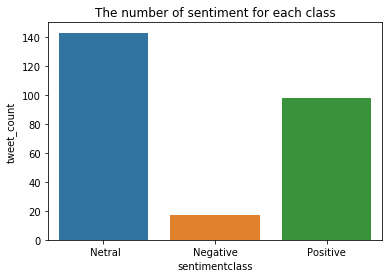

In [134]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

#### 4.2. Pie Chart

(-1.1206743804872066,
 1.3105681588717188,
 -1.1104684377405178,
 1.1180458850141168)

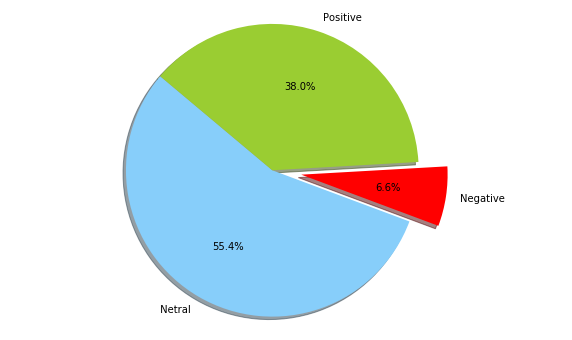

In [135]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

In [ ]:
#make wordclud 

In [ ]:
new_df[]